In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cars.csv')

In [ ]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
df.size

180

In [ ]:
df.shape

(36, 5)

In [ ]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [ ]:
for i in df.columns:
  print(i)

Car
Model
Volume
Weight
CO2


In [ ]:
X = pd.DataFrame(df, columns = ['Volume', 'Weight'])
X

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140
5,1000,929
6,1400,1109
7,1500,1365
8,1500,1112
9,1600,1150


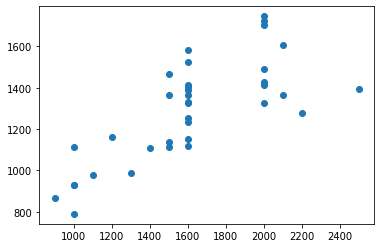

In [ ]:
plt.scatter(df['Volume'], df['Weight'])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
clusters = kmeans.fit_predict(X)
clusters

array([1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[2081.81818182, 1498.36363636],
       [1062.5       ,  969.375     ],
       [1564.70588235, 1310.88235294]])

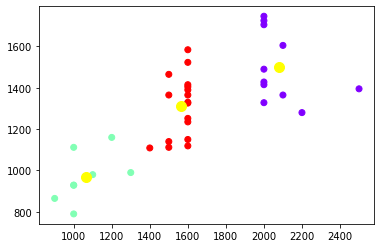

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = clusters
plt.scatter(data_with_clusters['Volume'], data_with_clusters['Weight'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, color = 'yellow')
plt.show()

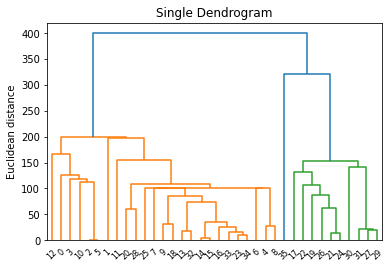

In [ ]:
Z = linkage(X, method = 'single')

dendro = dendrogram(Z)
plt.title('Single Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

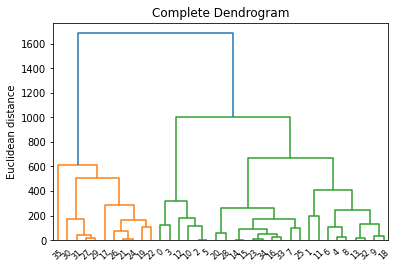

In [ ]:
Z = linkage(X, method = 'complete')

dendro = dendrogram(Z)
plt.title('Complete Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

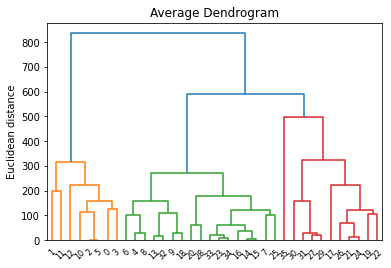

In [ ]:
Z = linkage(X, method = 'average')

dendro = dendrogram(Z)
plt.title('Average Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Cluster 1 Inertia 7347394.777777779
Cluster 2 Inertia 3045987.4690909097
Cluster 3 Inertia 1158577.3509358289
Cluster 4 Inertia 880446.2282467533
Cluster 5 Inertia 616493.0821428571
Cluster 6 Inertia 442824.12976190477
Cluster 7 Inertia 308300.51666666666
Cluster 8 Inertia 260583.2916666667
Cluster 9 Inertia 218225.3357142857
Cluster 10 Inertia 176592.00238095236
Cluster 11 Inertia 155727.98571428572
Cluster 12 Inertia 140200.38333333333
Cluster 13 Inertia 111245.25238095238
Cluster 14 Inertia 92605.38333333333
Cluster 15 Inertia 72837.75
Cluster 16 Inertia 62364.3
Cluster 17 Inertia 47878.66666666667
Cluster 18 Inertia 40066.16666666667
Cluster 19 Inertia 35223.5
Cluster 20 Inertia 25712.0


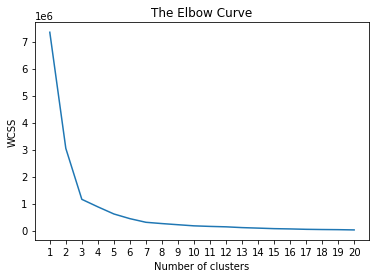

In [ ]:
wcss = []
for i in range(1, 21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1274)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(f'Cluster {i} Inertia {kmeans.inertia_}')

plt.plot(range(1, 21), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.xticks(list(range(1, 21)))
plt.ylabel('WCSS')
plt.show()